In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import warnings
import plotly.graph_objs as go
from plotly import tools
from wordcloud import WordCloud
warnings.filterwarnings('ignore') 

  1. [Read and Check Data](#1)
  1. [Data Description](#2)
  1. [Numeric Variable Analysis](#3)
  1. [Categorical Variable Analysis](#4)
  1. [Visualization](#5)

<a id="1" ></a><br>
# Read and Check Data

In [2]:
data=pd.read_csv('../input/data-science-job-salaries/ds_salaries.csv')

In [3]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
data=data.drop(columns='Unnamed: 0')

In [5]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
data.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [7]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<a id="2" ></a><br>
# Data Description
* **work_year**: The year the salary was paid.            
* **experience_level**: The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director      
* **employment_type**: The type of employement for the role: PT Part-time ,FT Full-time ,CT Contract ,FL Freelance.      
* **job_title**: The role worked in during the year.             
* **salary**: The total gross salary amount paid.               
* **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.     
* **salary_in_usd**: The salary in USD.        
* **employee_residence**: Employee's primary country of residence in during the work year as an ISO 3166 country code.    
* **remote_ratio**: The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%).          
* **company_location**:The country of the employer's main office or contracting branch as an ISO 3166 country code.       
* **company_size**: The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large). 

In [8]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [9]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

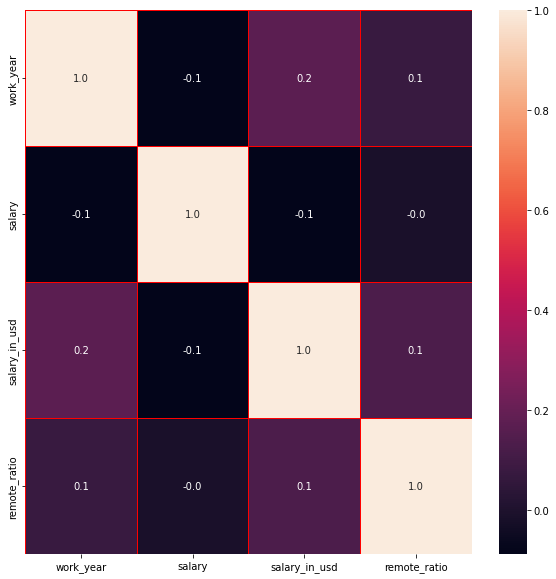

In [10]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

<a id="3" ></a><br>
# Numeric Variable Analysis

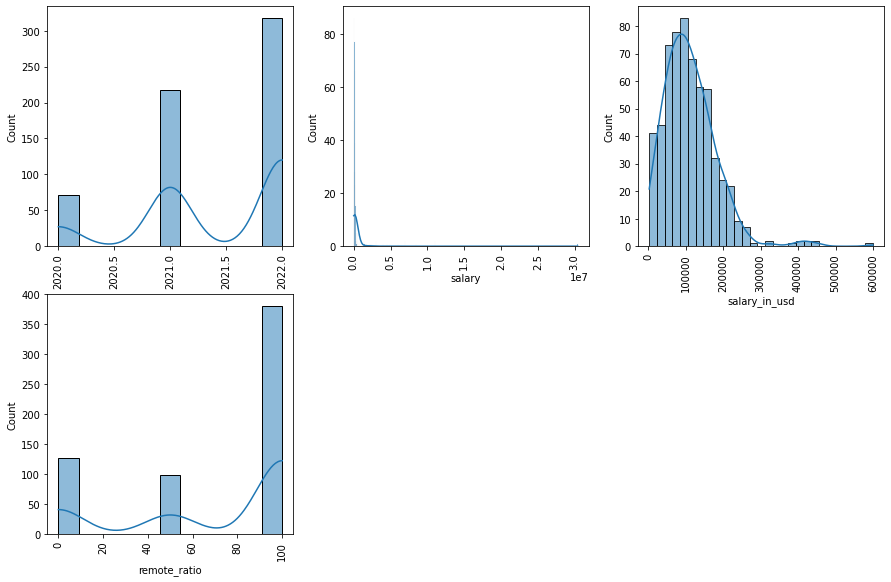

In [11]:
d_numeric=data.select_dtypes(include=('int'))
d_columns_n=[i for i in d_numeric.columns]
plt.figure(figsize=(15,15))

for i in range(len(d_columns_n)):
    plt.subplot(3,3,i+1)
    col=d_columns_n[i]
    sns.histplot(d_numeric[col],kde=True)
    plt.xticks(rotation=90)
    

<a id="4" ></a><br>
# Categorical Variable Analysis

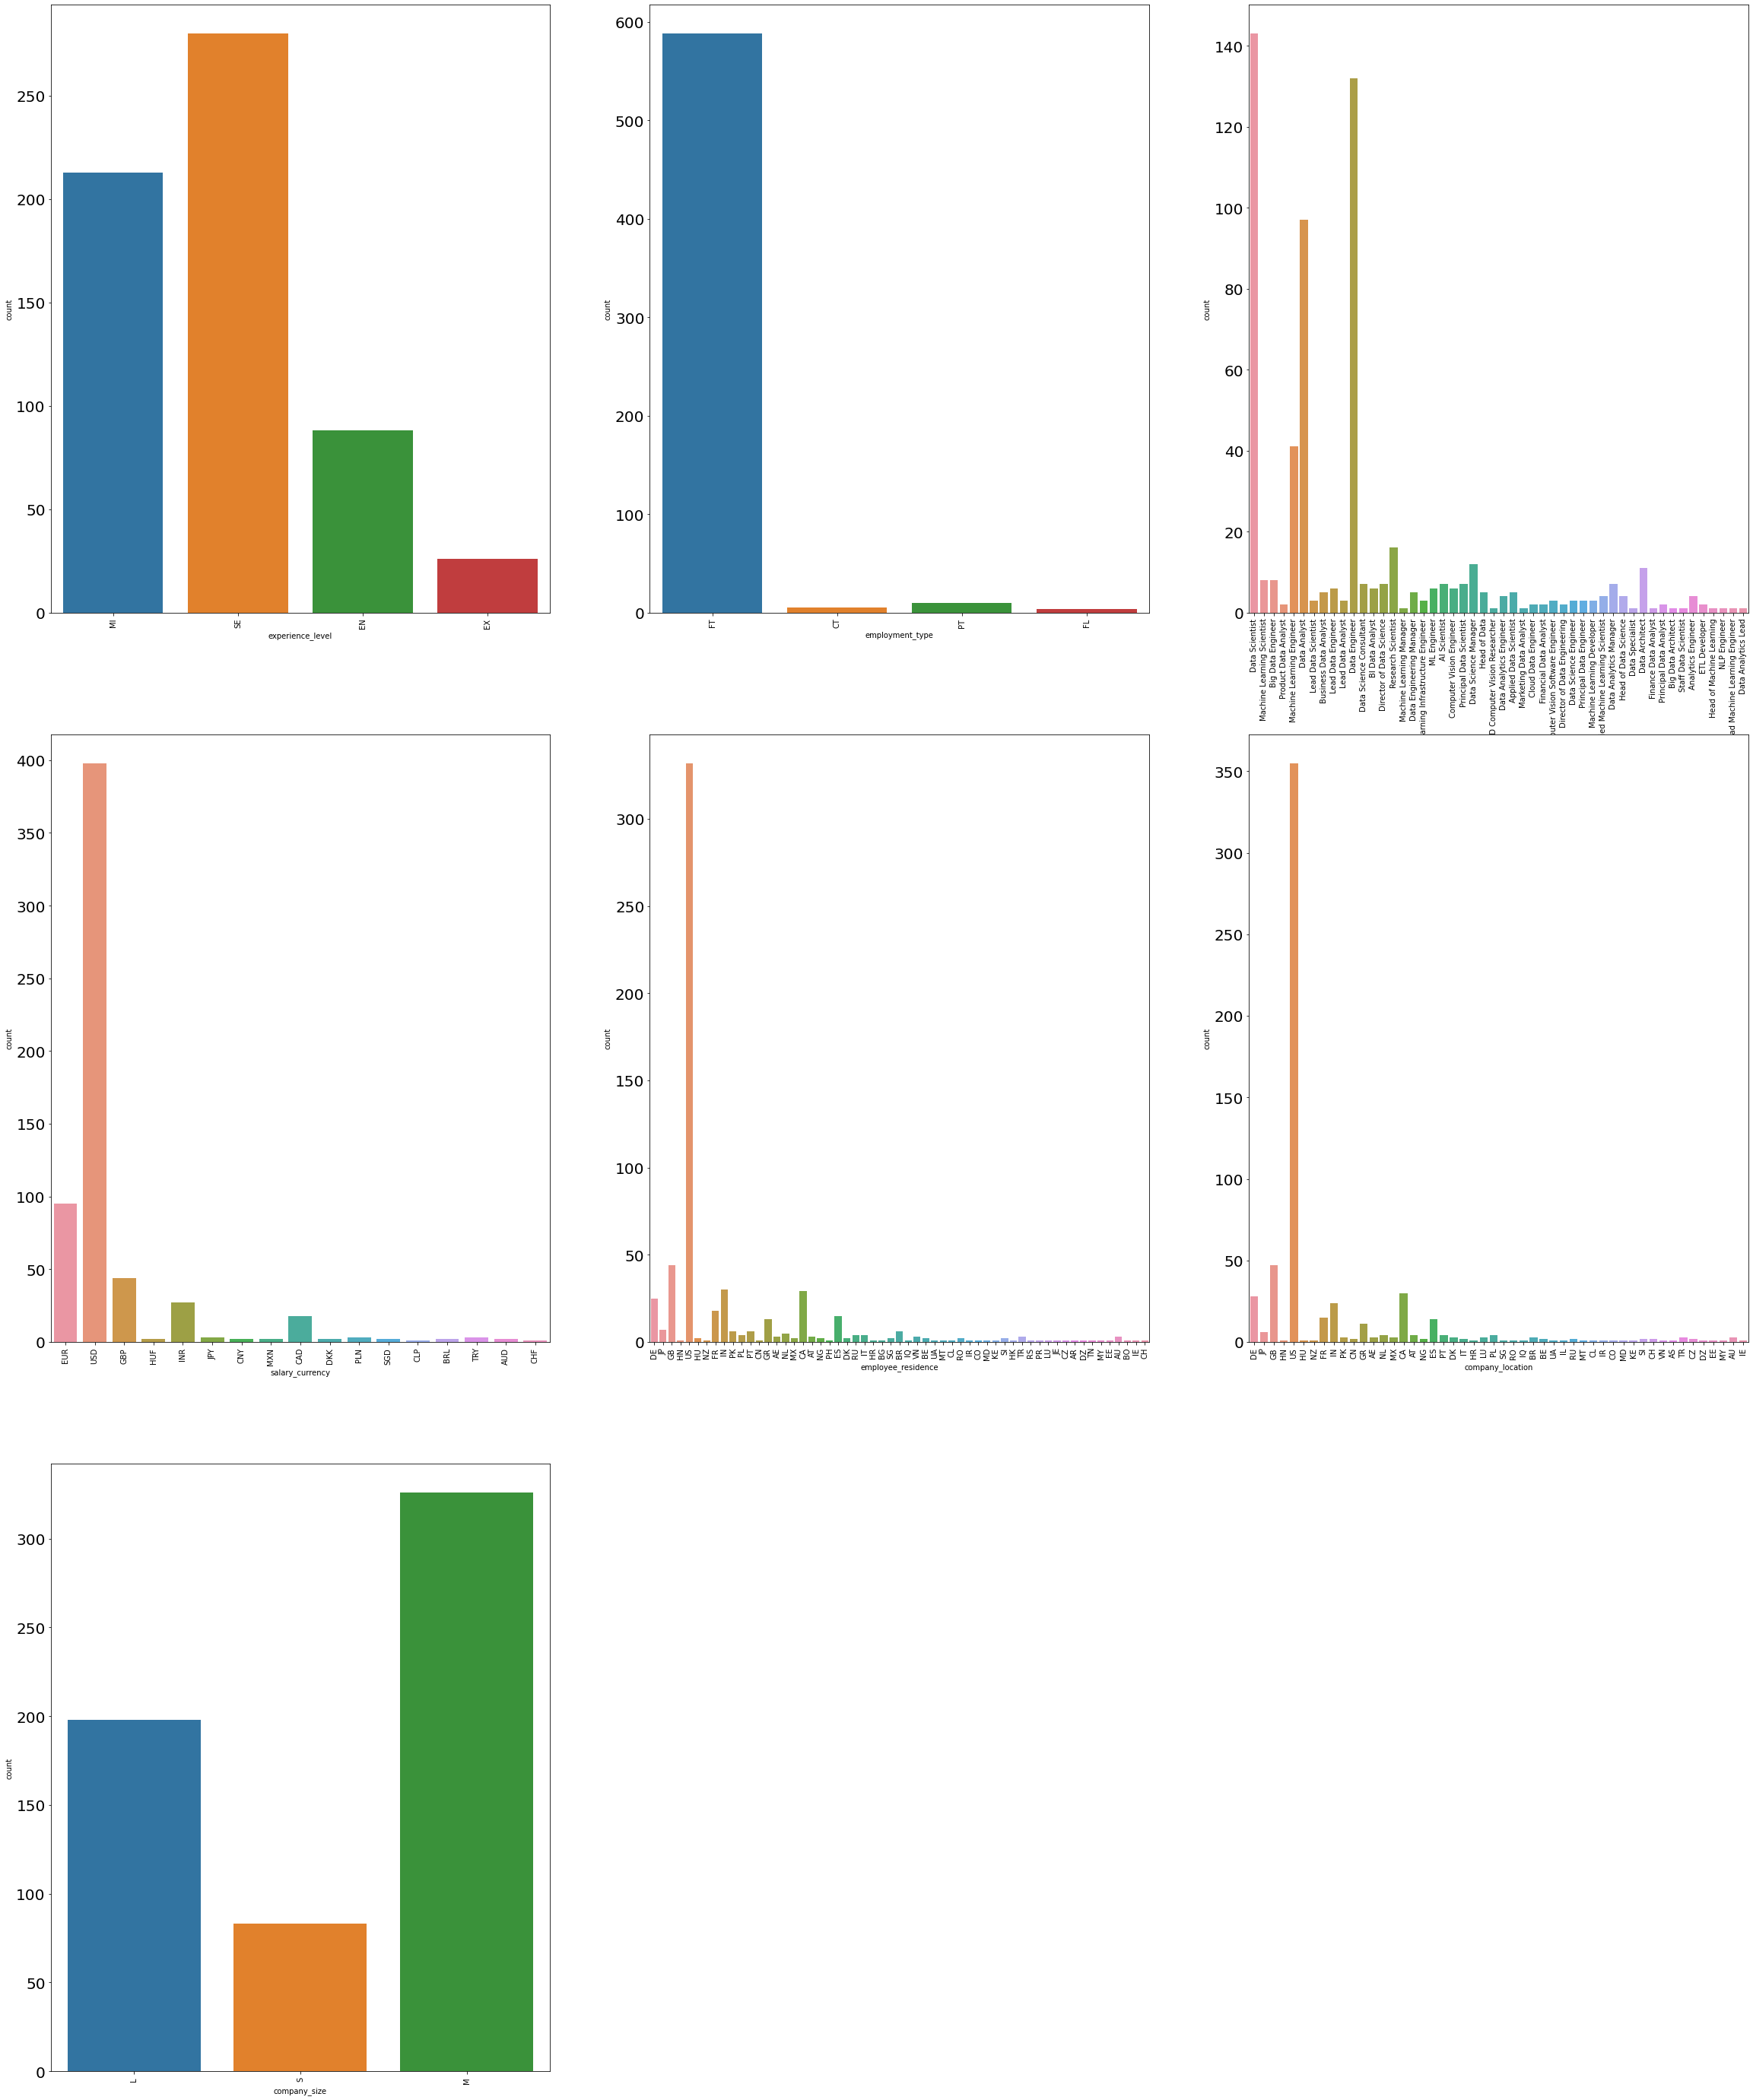

In [12]:
d_categorical=data.select_dtypes(include=('object'))
d_columns=[i for i in d_categorical.columns]
plt.figure(figsize=(40,50))

for i in range(len(d_columns)):
    plt.subplot(3,3,i+1)
    col=d_columns[i]
    sns.countplot(d_categorical[col])
    plt.xticks(rotation=90)
    plt.yticks(size=20)

    


<a id="5" ></a><br>
# Visualization

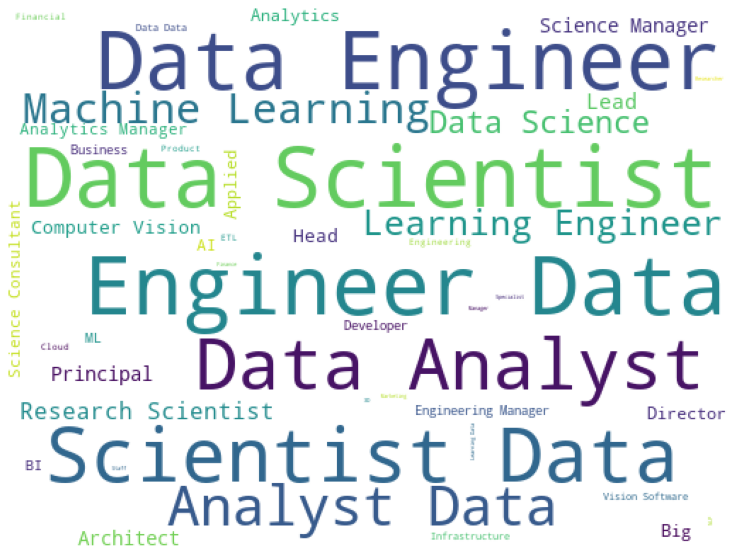

In [13]:
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(data.job_title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

### Top 10 most populer jobs

In [14]:
df=data.job_title.value_counts().head(10)


In [15]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df.index,
    y=df.values,
    
    marker_color='indianred'
))



fig.update_layout( xaxis_tickangle=-45)
fig.show()

In [16]:
fig = go.Figure(data=[go.Pie(labels=df.index, values=df.values)])
fig.show()

### Level distribution in most popular professions

In [17]:
df_1=data[data.experience_level=='MI']
df_2=data[data.experience_level=='SE']
df_3=data[data.experience_level=='EN']
df_4=data[data.experience_level=='EX']


fig = go.Figure(data=[
    go.Bar(name='MI', x=df_1.job_title.value_counts().head(10).index, y=df_1.job_title.value_counts().head(10).values),
        go.Bar(name='SE', x=df_2.job_title.value_counts().head(10).index, y=df_2.job_title.value_counts().head(10).values),
        go.Bar(name='EN', x=df_3.job_title.value_counts().head(10).index, y=df_3.job_title.value_counts().head(10).values),
        go.Bar(name='EX', x=df_4.job_title.value_counts().head(10).index, y=df_4.job_title.value_counts().head(10).values)



    
    
])

fig.update_layout(barmode='group')
fig.show()

In [18]:
# Top 10 Most Popular Jobs And Salaries Average
ratio=[]
for i in df.index:
    x=data[data['job_title']==i]
    rate=sum(x.salary_in_usd)/len(x)
    ratio.append(rate)
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=ratio,
                    mode='lines+markers',
                    name='lines+markers'))

fig.update_layout( title='Top 10 Most Popular Jobs And Salaries Average')
fig.show()    
    


### Top 10 Countries With The Most Employees

In [19]:
df_c=data.company_location.value_counts().head(10)


In [20]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_c.index,
    y=df_c.values,
    
    marker_color='indianred'
))



fig.update_layout( xaxis_tickangle=-45)
fig.show()


In [21]:
fig = go.Figure(data=[go.Pie(labels=df_c.index, values=df_c.values)])
fig.show()

### Level distribution in the most popular countries

In [22]:
fig = go.Figure(data=[
    go.Bar(name='MI', x=df_1.company_location.value_counts().head(10).index, y=df_1.company_location.value_counts().head(10).values),
        go.Bar(name='SE', x=df_2.company_location.value_counts().head(10).index, y=df_2.company_location.value_counts().head(10).values),
        go.Bar(name='EN', x=df_3.company_location.value_counts().head(10).index, y=df_3.company_location.value_counts().head(10).values),
        go.Bar(name='EX', x=df_4.company_location.value_counts().head(10).index, y=df_4.company_location.value_counts().head(10).values)



    
    
])

fig.update_layout(barmode='group')
fig.show()

In [23]:
# Top 10 Countries With The Most Employees and Salaries Average
ratio_c=[]
for i in df_c.index:
    x=data[data['company_location']==i]
    rate=sum(x.salary_in_usd)/len(x)
    ratio_c.append(rate)
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_c.index, y=ratio_c,
                    mode='lines+markers',
                    name='lines+markers'))

fig.update_layout( title='Top 10 Countries With The Most Companies and Salaries Average')
fig.show()    

In [24]:
data2020=data[data.work_year==2020]
data2021=data[data.work_year==2021]
data2022=data[data.work_year==2022]

### Salaries Distribution By Years for box plot

In [25]:
fig = go.Figure()
fig.add_trace(go.Box(y=data2020.salary_in_usd,name='2020 salaries usd'))
fig.add_trace(go.Box(y=data2021.salary_in_usd,name='2021 salaries usd'))
fig.add_trace(go.Box(y=data2022.salary_in_usd,name='2022 salaries usd'))
fig.add_trace(go.Box(y=data.salary_in_usd,name='salaries usd'))
fig.show()

###  Populer jobs By Years


In [26]:

fig = go.Figure(data=[
    go.Bar(name='2022', x=data2022.job_title.value_counts().head(10).index, y=data2022.job_title.value_counts().values),
    go.Bar(name='2021', x=data2021.job_title.value_counts().head(10).index, y=data2021.job_title.value_counts().values),
    go.Bar(name='2020', x=data2020.job_title.value_counts().head(10).index, y=data2020.job_title.value_counts().values)
])

fig.update_layout(barmode='group')
fig.show()

In [27]:
# salaries average  by years
ratio_y=[]
for i in data.work_year.unique():
    x=data[data['work_year']==i]
    rate=sum(x.salary_in_usd)/len(x)
    ratio_y.append(rate)
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.work_year.unique(), y=ratio_y,
                    mode='lines+markers',
                    name='lines+markers'))

fig.update_layout( title='salaries average by years')
fig.show()    

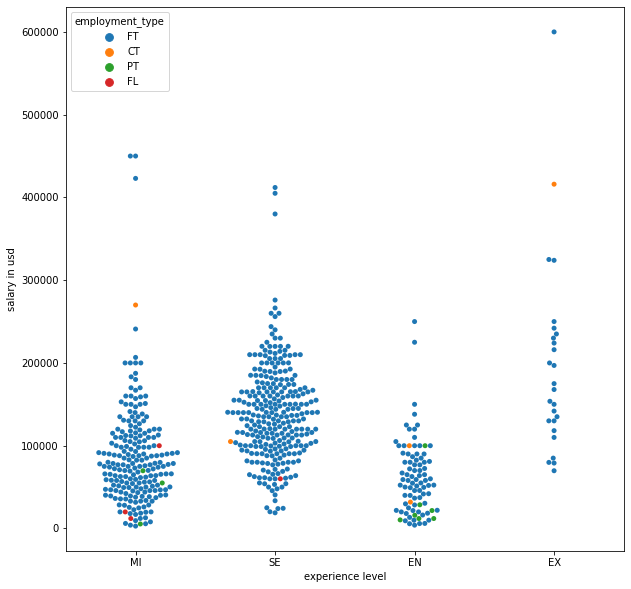

In [28]:
#experience level & salary in usd & employment_type swarm plot
plt.figure(figsize=(10,10))
sns.swarmplot(data=data,x='experience_level',y='salary_in_usd',hue='employment_type')
plt.xlabel('experience level')
plt.ylabel('salary in usd')
plt.show()

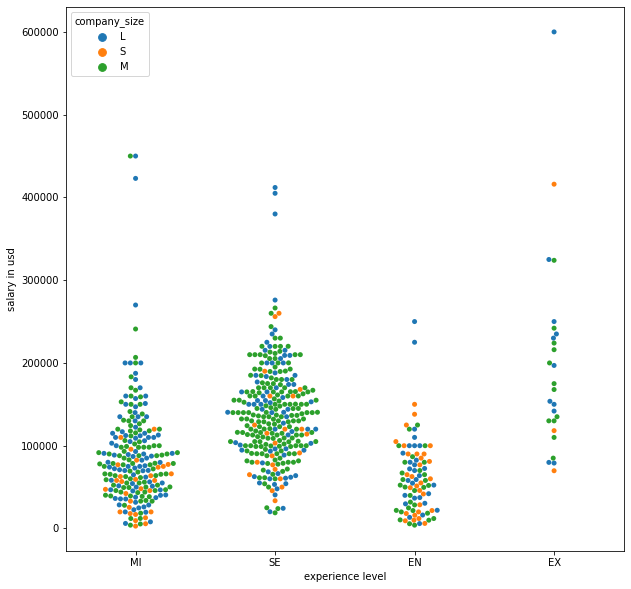

In [29]:
#experience level & salary in usd & company_size swarm plot
plt.figure(figsize=(10,10))
sns.swarmplot(data=data,x='experience_level',y='salary_in_usd',hue='company_size')
plt.xlabel('experience level')
plt.ylabel('salary in usd')
plt.show()